In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab



In [2]:
# Loading Mall Customer information
import pandas as pd

#csv file containing a list of customers with their gender, age, annual income and spending score.
dataset = pd.read_csv('Mall_Customers.csv')

dataset


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


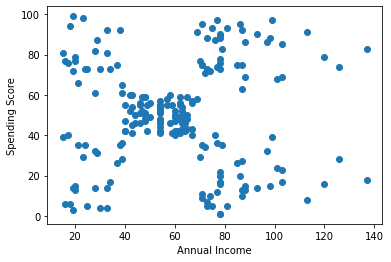

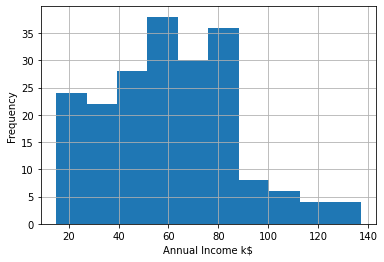

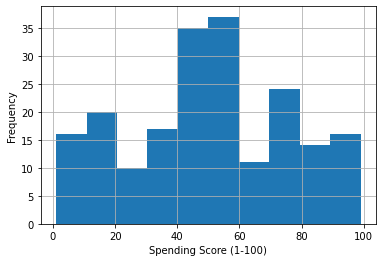

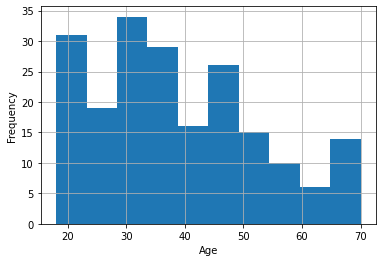

In [3]:
X = dataset.iloc[:, [3, 4]].values
age= dataset.iloc[:, 2].values
plt.figure(1)
plt.scatter(X[:,0],X[:,1], marker = 'o')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.figure(2)
plt.hist(X[:,0])
plt.xlabel('Annual Income k$')
plt.ylabel('Frequency')
plt.grid()

plt.figure(3)
plt.hist(X[:,1])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.grid()

plt.figure(4)
plt.hist(age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()

# Hierarchal Clustering 

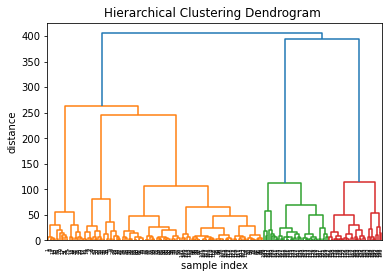

In [5]:

import scipy.cluster.hierarchy as sch

plt.title('Hierarchical Clustering Dendrogram ')
plt.xlabel('sample index')
plt.ylabel('distance')
# Show Dendrogram, show only the last p merged clusters
#dendrogram = sch.dendrogram(sch.linkage(X, method='ward'),distance_sort=True,truncate_mode='lastp',  p=20)

# Show Dendrogram whole
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'),distance_sort=True)


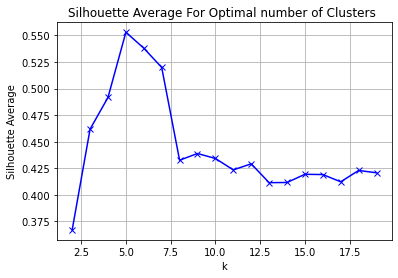

In [6]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

SS_distances= []
I = range(2,20)
for i in I:
       HC = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
       HC= HC.fit(X)
       score_H= metrics.silhouette_score(X, HC.labels_)
       SS_distances.append(score_H)

# plotting Silhouette for different clusters
plt.plot(I, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Average For Optimal number of Clusters ')    
plt.grid()
#HC = AgglomerativeClustering(distance_threshold=40,n_clusters=None, affinity='euclidean', linkage='ward')


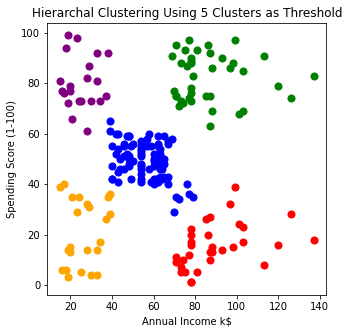

In [7]:


# Now use optimal Silhouette to choose # clusters which is 5
HC = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
HC.fit(X)
labels = HC.labels_

plt.figure(figsize=(5,5))
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.xlabel('Annual Income k$')
plt.ylabel('Spending Score (1-100)')
plt.title('Hierarchal Clustering Using 5 Clusters as Threshold')
plt.show()

# DBSCAN and Best eps and minPts

### Minimum Samples (“MinPts”)

There is no automatic way to determine the MinPts value for DBSCAN. Ultimately, the MinPts value should be set using domain knowledge and familiarity with the data set. From some research I’ve done, here are a few rules of thumb for selecting the MinPts value:

    -  The larger the data set, the larger the value of MinPts should be
    -  If the data set is noisier, choose a larger value of MinPts
    -  Generally, MinPts should be greater than or equal to the dimensionality of the data set
    -  For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
    -  If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998)
    
    source: https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

### Finding best Epsilon 
After you select your MinPts value, you can move on to determining ε. One technique to automatically determine the optimal ε value is described in this paper. This technique calculates the average distance between each point and its k nearest neighbors, where k = the MinPts value you selected. The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope)

Text(0, 0.5, '4th Nearest Neighbours Distance')

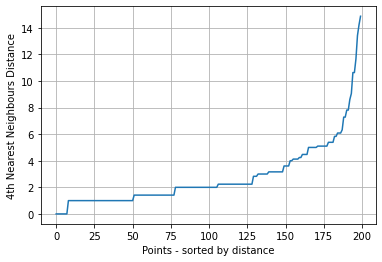

In [8]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

# Step 1: Calculate the average distance between each point in the data set and its 20 nearest neighbors (my selected MinPts value)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Step2: Sort distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()
plt.xlabel('Points - sorted by distance')
plt.ylabel('4th Nearest Neighbours Distance')




The ideal value for ε will be equal to the distance value at the “crook of the elbow”, or the point of maximum curvature. This point represents the optimization point where diminishing returns are no longer worth the additional cost. This concept of diminishing returns applies here because while increasing the number of clusters will always improve the fit of the model, it also increases the risk that overfitting will occur.

In [9]:
# DBSCAN using Minpts=4 and eps=8 (curvature)
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=8, min_samples=4)
dbscan.fit(X)
label = dbscan.labels_
label

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1,  0,  2, -1,  2,  0,  1,  0, -1,  0,
       -1,  0, -1,  0,  3,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  5,  4,  5,  4, -1,  4,  5,  4, -1, -1,  6,
       -1,  6,  4,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

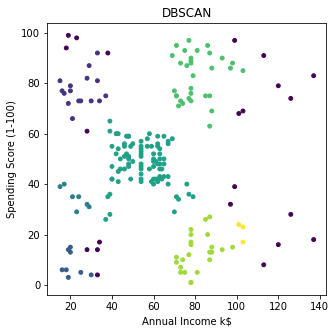

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c=label,s=15)
plt.xlabel('Annual Income k$')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN')
plt.show()

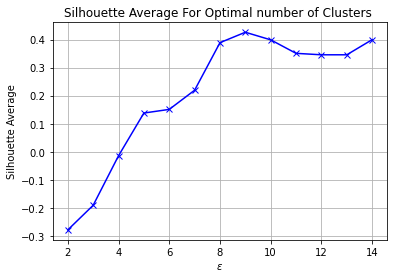

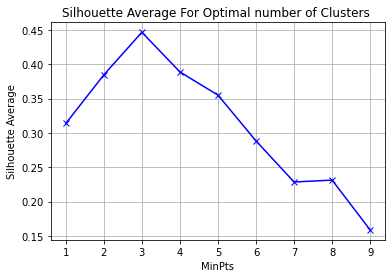

In [11]:
## Finding epsilon using silhouette

SS_distances= []
I = range(2,15)
for i in I:
       dbscan=DBSCAN(eps=i, min_samples=4)
       dbscan= dbscan.fit(X)
       score_db= metrics.silhouette_score(X, dbscan.labels_)
       SS_distances.append(score_db)

# plotting Silhouette for different clusters
plt.plot(I, SS_distances, 'bx-')
plt.xlabel('$ε$')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Average For Optimal number of Clusters ')    
plt.grid()
plt.show()

# Finding Best Nearest Neighbours using e=8


SS_distances= []
I = range(1,10)
for i in I:
       dbscan=DBSCAN(eps=8, min_samples=i)
       dbscan= dbscan.fit(X)
       score_db= metrics.silhouette_score(X, dbscan.labels_)
       SS_distances.append(score_db)

# plotting Silhouette for different clusters

plt.plot(I, SS_distances, 'bx-')
plt.xlabel('MinPts')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Average For Optimal number of Clusters ')    
plt.grid()





Optimal Minpts=3
Optimal $\epsilon$=8

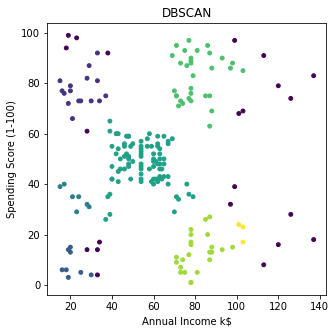

In [12]:
# Using optimal Minpts and $\epsilon$
dbscan=DBSCAN(eps=9, min_samples=3)
dbscan.fit(X)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c=label,s=15)
plt.xlabel('Annual Income k$')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN')
plt.show()

# K-means Clustering

C:\Users\matha\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


Text(0.5, 1.0, 'Elbow Method For Optimal k')

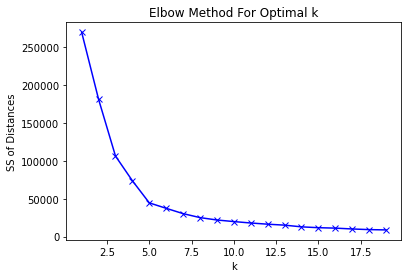

In [13]:
#Finding Best k using WSSE 
from sklearn.cluster import KMeans
SS_distances= []
I = range(1,20)
for i in I:
       k_means = KMeans(n_clusters=i)
       k_means= k_means.fit(X)
       SS_distances.append(k_means.inertia_)
   


centers = k_means.cluster_centers_

# plotting SSE distances (for each point to the nearest Center) versus number of k 
plt.plot(I, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SS of Distances')
plt.title('Elbow Method For Optimal k')

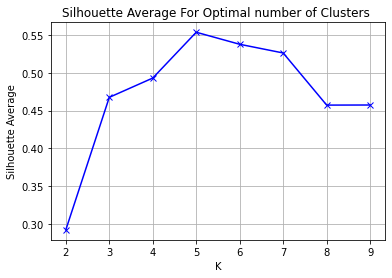

In [14]:
# Finding Bets K using Silhouette Ave
SS_distances= []
I = range(2,10)
for i in I:
       k_means = KMeans(n_clusters=i)
       k_means= k_means.fit(X)
       score_kmean= metrics.silhouette_score(X, k_means.labels_)
       SS_distances.append(score_kmean)

# plotting Silhouette for different clusters

plt.plot(I, SS_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Average For Optimal number of Clusters ')    
plt.grid()

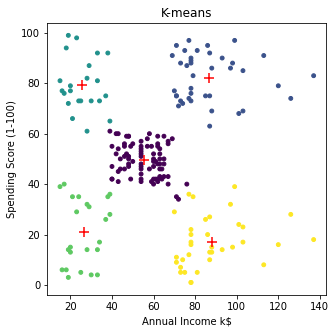

In [15]:
# Train k_means using optimal number of clusters
k_means = KMeans(n_clusters=5)
k_means= k_means.fit(X)


# Plot Clusters and their centers

label = k_means.labels_
centers = k_means.cluster_centers_

plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c=label,s=15)
plt.scatter(centers[:,0], centers[:,1], color ='red', marker='+', s=100) 
plt.xlabel('Annual Income k$')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means')
plt.show()

In [16]:
# Validation  -- All three methods

from sklearn import metrics
score1 = metrics.silhouette_score(X, HC.labels_)
score2 = metrics.silhouette_score(X, dbscan.labels_)
score3 = metrics.silhouette_score(X, k_means.labels_)

print("Hierarchal: Silhoutte Score = ", score1)
print("DBSCAN:  Silhoutte Score = ", score2)
print("K-means: Silhoutte Score = ", score3)

Hierarchal: Silhoutte Score =  0.5529945955148897
DBSCAN:  Silhoutte Score =  0.475053701963407
K-means: Silhoutte Score =  0.553931997444648


In [17]:
#from yellowbrick.cluster import KElbowVisualizer

#kmeans = KMeans(random_state=42)
#visual = KElbowVisualizer(kmeans, k = (2,10))
#visual.fit(X)
#visual.poof()